# Zero Shot Clasificación para Imágenes

Existen numerosos modelos en `Hugging-Face` utilizados para este tipo de tareas: https://huggingface.co/models?pipeline_tag=zero-shot-image-classification

En nuestro caso, se ha querido emplear el siguiente modelo de *OpenAI*: https://huggingface.co/openai/clip-vit-large-patch14

`Carga del modelo`

In [1]:
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

C:\Users\p_san\anaconda3\envs\zero_shot_image\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All PyTorch model weights were used when initializing TFCLIPModel.

All the weights of TFCLIPModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


`Ejemplo de uso`

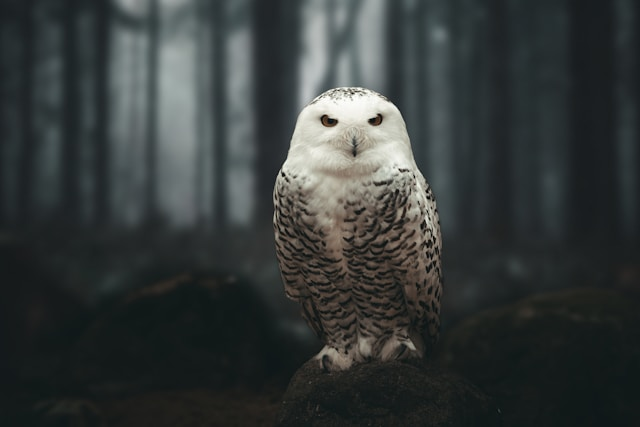

In [3]:
from PIL import Image
import requests

url = "https://unsplash.com/photos/g8oS8-82DxI/download?ixid=MnwxMjA3fDB8MXx0b3BpY3x8SnBnNktpZGwtSGt8fHx8fDJ8fDE2NzgxMDYwODc&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)

image

Una vez leída la imagen desde la URL, se hace uso del modelo que previamente habemos descargado.

En este caso, se plantean los siguientes posibles tipos de animales (zorro, oso, gaviota, búho). 

In [4]:
predictions = detector(image, candidate_labels=["fox", "bear", "seagull", "owl"])
predictions

[{'score': 0.9992450475692749, 'label': 'owl'},
 {'score': 0.0005944105796515942, 'label': 'seagull'},
 {'score': 8.649237133795395e-05, 'label': 'fox'},
 {'score': 7.409310637740418e-05, 'label': 'bear'}]

Como puede verse, el modelo nos proporciona una lista de diccionarios con la puntuación para cada etiqueta planteada en el análisis.  

`Caso de uso`

A partir de una serie de imágenes de animales se quiere predecir el tipo de animal. Los posibles tipos son:

- Oso
- Caballo
- Pájaro
- Gato
- Perro
- Elefante
- Tigre
- Oso panda
- León


In [8]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

Leemos las imágenes con las funcionalidades que nos proporciona *tensorflow-keras*. 

Se crean dos listas, que contienen las imágenes y el nombre para su identificación, respectivamente.

In [10]:
path = "../animal_data/"

file_list = []
image_load_list = []
for file in os.listdir(path):
    # Comprobar si el elemento es un archivo (no un directorio)
    if os.path.isfile(os.path.join(path, file)):
        file_list.append(file)
        image_load = tf.keras.preprocessing.image.load_img(os.path.join(path, file))
        image_load_list.append(image_load)

Se define una lista con los diferentes tipos de animales que queremos categorizar

In [16]:
target_list = ["oso", "caballo", "pájaro", "gato", "perro", "elefante", "tigre", "oso panda", "león"]

Se realizan las predicciones para cada imagen y se guardan en un diccionario con:
- Nombre de la imagen
- Salida del modelo (puntuación + etiqueta)

In [17]:
predictions_image_dict = {}
for i, j in zip(image_load_list, file_list):
    
    predictions = detector(i, candidate_labels=target_list) # predicciones de cada una de ellas imágenes
    
    # obtener la key del diccionario (se reemplaza la extensión del fichero")
    j = j.replace(".jpg", "").replace(".jpeg", "")
    
    predictions_image_dict[j] = predictions # se obtiene el diccinario de predicciones de animales para cada imagen

- Valores predichos para la primera imagen

In [18]:
predictions_image_dict["image01"]

[{'score': 0.7388302683830261, 'label': 'oso'},
 {'score': 0.13839274644851685, 'label': 'oso panda'},
 {'score': 0.05306915193796158, 'label': 'león'},
 {'score': 0.03733852505683899, 'label': 'caballo'},
 {'score': 0.019344203174114227, 'label': 'elefante'},
 {'score': 0.010503088124096394, 'label': 'perro'},
 {'score': 0.0013112149899825454, 'label': 'tigre'},
 {'score': 0.000996336922980845, 'label': 'gato'},
 {'score': 0.0002144181344192475, 'label': 'pájaro'}]

- Todas las imágenes: puntuación para la categoría mayoritaria

In [19]:
for image, value in predictions_image_dict.items():
    print(f"{image} - {value[0]}")

image01 - {'score': 0.7388302683830261, 'label': 'oso'}
image02 - {'score': 0.9905300736427307, 'label': 'tigre'}
image03 - {'score': 0.9661238789558411, 'label': 'león'}
image04 - {'score': 0.9991081357002258, 'label': 'pájaro'}
image05 - {'score': 0.6722232699394226, 'label': 'gato'}
image06 - {'score': 0.9617704749107361, 'label': 'perro'}
image07 - {'score': 0.7130976319313049, 'label': 'oso'}
image08 - {'score': 0.9955784678459167, 'label': 'elefante'}
image09 - {'score': 0.936734139919281, 'label': 'tigre'}
image10 - {'score': 0.8364549279212952, 'label': 'gato'}
image11 - {'score': 0.9920086860656738, 'label': 'pájaro'}
image12 - {'score': 0.9917984008789062, 'label': 'pájaro'}
image13 - {'score': 0.7964518070220947, 'label': 'oso'}
image14 - {'score': 0.9357089400291443, 'label': 'león'}
image15 - {'score': 0.9497395753860474, 'label': 'perro'}
image16 - {'score': 0.9951352477073669, 'label': 'elefante'}
image17 - {'score': 0.9753184914588928, 'label': 'caballo'}
image18 - {'sc